📊 Entity Distribution (Only Valid Tags, excluding 'O'):
EDU: 8325
HSK: 103902
ORG: 16060
LOC: 6844
JOB: 11389
YOE: 8271


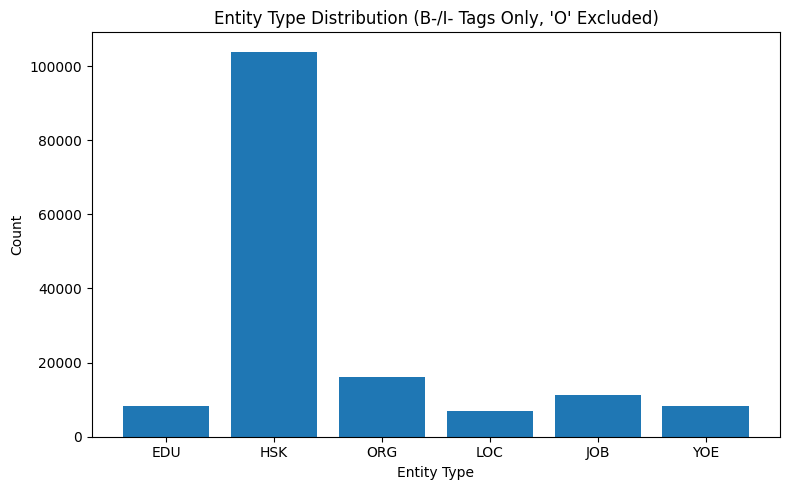

In [1]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Final Processed Dataset.csv")
df["parsed_list"] = df["parsed_list"].apply(ast.literal_eval)

# Define valid tags
valid_tags = {
    "B-HSK", "I-HSK", "B-JOB", "I-JOB", "B-YOE", "I-YOE",
    "B-ORG", "I-ORG", "B-LOC", "I-LOC", "B-EDU", "I-EDU", "O"
}

# Parse and clean parsed_list
data = [
    [(token[0], token[1]) for token in row if isinstance(token, (list, tuple)) and len(token) >= 2]
    for row in df['parsed_list']
]

# Flatten and filter valid tags
all_tags = [label for sentence in data for (_, label) in sentence if label in valid_tags]

# === Plot 1: Just Entity Types (O excluded, strip B-/I- prefixes) ===
entity_types = [tag.split("-")[1] for tag in all_tags if tag != "O"]
entity_counts = Counter(entity_types)

print("📊 Entity Distribution (Only Valid Tags, excluding 'O'):")
for entity, count in entity_counts.items():
    print(f"{entity}: {count}")

plt.figure(figsize=(8, 5))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title("Entity Type Distribution (B-/I- Tags Only, 'O' Excluded)")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



📊 Full Tag Distribution (Including 'O'):
B-EDU: 2081
I-EDU: 6244
B-HSK: 54131
O: 808042
B-ORG: 8875
B-LOC: 4597
B-JOB: 4296
I-JOB: 7093
I-HSK: 49771
I-ORG: 7185
B-YOE: 2789
I-YOE: 5482
I-LOC: 2247


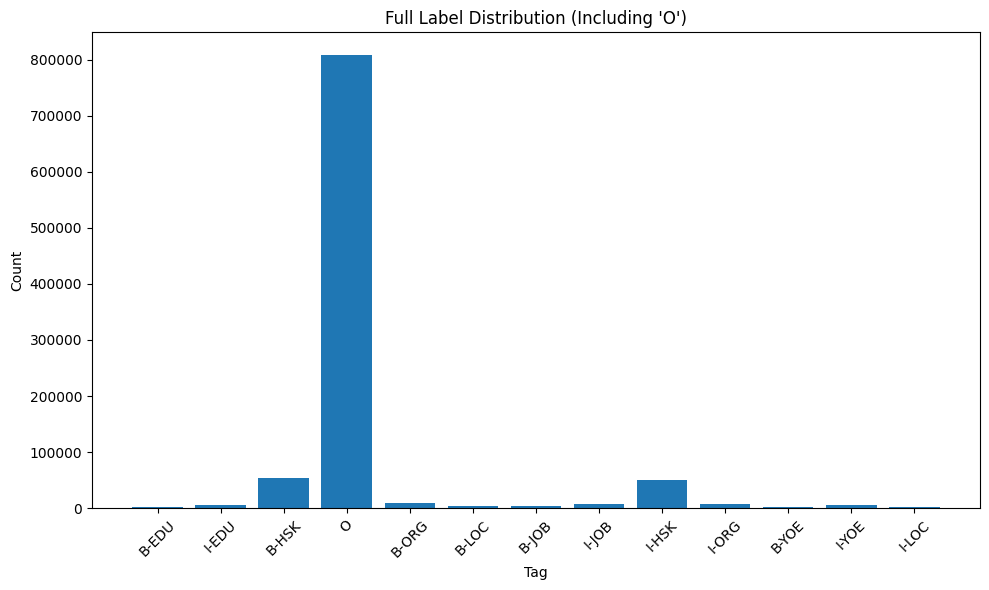

In [2]:

# === Plot 2: Full Tag Distribution Including 'O' ===
tag_counts_full = Counter(all_tags)

print("\n📊 Full Tag Distribution (Including 'O'):")
for tag, count in tag_counts_full.items():
    print(f"{tag}: {count}")

plt.figure(figsize=(10, 6))
plt.bar(tag_counts_full.keys(), tag_counts_full.values())
plt.title("Full Label Distribution (Including 'O')")
plt.xlabel("Tag")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
bad_tags = [tag for tag in all_tags if tag != "O" and ("-" not in tag or len(tag.split("-")) != 2)]
print("⚠️ Malformed tags found:", set(bad_tags))

⚠️ Malformed tags found: set()


In [4]:
import pandas as pd
import ast

# Load dataset
df = pd.read_csv("Final Processed Dataset.csv")
df["parsed_list"] = df["parsed_list"].apply(ast.literal_eval)

# Define valid tags
valid_tags = {
    "B-HSK", "I-HSK", "B-JOB", "I-JOB", "B-YOE", "I-YOE",
    "B-ORG", "I-ORG", "B-LOC", "I-LOC", "B-EDU", "I-EDU", "O"
}

# Identify rows with invalid tags and their positions
invalid_info = []

for idx, row in df.iterrows():
    parsed = row["parsed_list"]
    invalid_indices = []
    try:
        for i, token in enumerate(parsed):
            if isinstance(token, (list, tuple)) and len(token) >= 2:
                if token[1] not in valid_tags:
                    invalid_indices.append((i, token[0], token[1]))
    except Exception:
        invalid_indices.append(("error_parsing", None, None))
    
    if invalid_indices:
        invalid_info.append({
            "index": idx,
            "sentence": row["sentence"],
            "parsed_list": parsed,
            "invalid_positions": invalid_indices
        })

# Convert to DataFrame
invalid_df = pd.DataFrame(invalid_info)

# Display
print(f"🧪 Found {len(invalid_df)} rows with invalid tags.\n")
pd.set_option('display.max_colwidth', None)
print(invalid_df[["index", "sentence", "invalid_positions"]].head())


🧪 Found 32 rows with invalid tags.

   index  \
0    149   
1    319   
2    353   
3    420   
4    445   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [6]:
invalid_df

index  \
0     149   
1     319   
2     353   
3     420   
4     445   
5     509   
6     526   
7     538   
8     602   
9     640   
10    670   
11    682   
12    712   
13    743   
14    761   
15    766   
16    913   
17    942   
18   1219   
19   1300   
20   1333   
21   1347   
22   1423   
23   1500   
24   1532   
25   1732   
26   1813   
27   1846   
28   1860   
29   1936   
30   2013   
31   2045   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [5]:
invalid_df.to_excel('invalid_rows.xlsx')